In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
replace New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator  
from keras_preprocessing.image import img_to_array , load_img
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [22]:
train_datag=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datag=ImageDataGenerator(preprocessing_function=preprocess_input)

train=train_datag.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(256,256),batch_size=32)
val=val_datag.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size=(256,256),batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [23]:
t_img,label=train.next()

In [24]:
def plotim(arr,label):
  for im,l in zip(arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/125)
    plt.show()

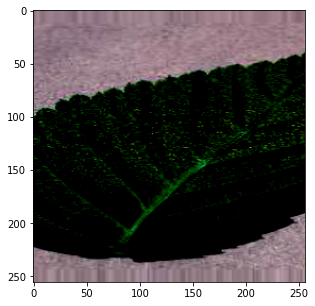

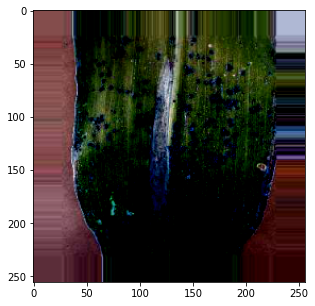

In [25]:
plotim(t_img[:2],label[:2])

#Boomm.!!

In [26]:
from  keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [27]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

In [28]:
for layers in base_model.layers:
  layers.trainable=False

In [29]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation="softmax")(X)

In [30]:
model=Model(base_model.input,X)

In [ ]:
model.summary()

In [32]:
model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [33]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
e=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1)
m=ModelCheckpoint(filepath="best_model.h5",monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,save_best_only=True)

c=[e,m]

In [56]:
from keras import callbacks
his=model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=c,
                        validation_data = val,
                        validation_steps=16)


<ipython-input-56-cfaa494e585c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 8.8219 - accuracy: 0.6875
Epoch 1: val_accuracy improved from 0.75586 to 0.78906, saving model to best_model.h5
16/16 [==============================] - 13s 810ms/step - loss: 8.8219 - accuracy: 0.6875 - val_loss: 5.9038 - val_accuracy: 0.7891
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 8.5920 - accuracy: 0.6777
Epoch 2: val_accuracy did not improve from 0.78906
16/16 [==============================] - 12s 763ms/step - loss: 8.5920 - accuracy: 0.6777 - val_loss: 7.6134 - val_accuracy: 0.7637
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 8.6607 - accuracy: 0.6992
Epoch 3: val_accuracy improved from 0.78906 to 0.80664, saving model to best_model.h5
16/16 [==============================] - 12s 783ms/step - loss: 8.6607 - accuracy: 0.6992 - val_loss: 4.8254 - val_accuracy: 0.8066
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 8.6449 - accuracy: 0.7148
Epoch

In [35]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"],c="red")
plt.show()

In [ ]:
plt.plot(h["loss"])
plt.plot(h["val_loss"],c="red")
plt.show()

In [36]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [37]:
ac=model.evaluate_generator(val)[1]
print(f"The Accuracy of your model is {ac*100} %")

<ipython-input-37-db4a0da00d21>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  ac=model.evaluate_generator(val)[1]


KeyboardInterrupt: ignored

In [46]:
d=zip(list(train.class_indices.values()),list(train.class_indices.keys()))
dis=dict(d)
print(dis)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [39]:
from IPython.display import Javascript
def open_web():
    url = 'https://www.google.com/'
    display(Javascript('window.open("{url}");'.format(url=url)))

In [47]:
from IPython.display import Javascript
def open_tomato():
    url = 'https://21eg105j35.wixsite.com/tomato-bacterial-spo'
    display(Javascript('window.open("{url}");'.format(url=url)))

def open_apple():
    url = 'https://21eg105j35.wixsite.com/my-site-2'
    display(Javascript('window.open("{url}");'.format(url=url)))

def open_peach():
    url = 'https://21eg105j35.wixsite.com/peach-bacterial-spot'
    display(Javascript('window.open("{url}");'.format(url=url)))

In [48]:
import webbrowser
def predc(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  
  img=np.expand_dims(im,axis=0)
  #print(img.shape)
  pred=np.argmax(model.predict(img))
  print(dis[pred])
  if(pred==2):
    print("hurray")
    open_apple()
  elif(pred==16):
    open_peach()
  elif(pred==28 or pred==29):
    open_tomato()
    
    
  

In [45]:
from IPython.display import Javascript
def open_tomato():
    url = 'https://21eg105j35.wixsite.com/tomato-bacterial-spo'
    display(Javascript('window.open("{url}");'.format(url=url)))

def open_apple():
    url = 'https://21eg105j35.wixsite.com/my-site-2'
    display(Javascript('window.open("{url}");'.format(url=url)))

def open_peach():
    url = 'https://21eg105j35.wixsite.com/peach-bacterial-spot'
    display(Javascript('window.open("{url}");'.format(url=url)))

UsageError: Line magic function `%%javascript` not found.


In [55]:
path="/content/app.jpeg"
predc(path)


1/1 [==============================] - 0s 77ms/step
Apple___Apple_scab


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 4.6 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=b2984424beb6cc401b7d1343f6604ee4aa7e7354ab2257a615e11c5b5ff86b32
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [2]:
cd /content

/content


In [3]:
from flask import Flask
from pyngrok import ngrok

In [4]:
port_no=5000

In [11]:
from flask import Flask, render_template, request,redirect

import numpy as np
import os

from keras.preprocessing.image import ImageDataGenerator  
from keras_preprocessing.image import img_to_array , load_img
from keras.models import load_model

In [50]:
app = Flask(__name__)
ngrok.set_auth_token("2IMVkUWxp8K5Te7Dph8hGb6KYb8_37uMSbnZwkqZHuci4MDTn")
public_url =  ngrok.connect(port_no).public_url
filepath = '/content/best_model.h5'
model = load_model(filepath)
print("Model Loaded Successfully")
def predcm(imagef):
  print("Got here")
  img=load_img(imagef,target_size=(256,256))
  print("Got here")
  i=img_to_array(img)
  print("Got here")
  im=preprocess_input(i)
  print("Got here")
  img=np.expand_dims(im,axis=0)
  #print(img.shape)
  print("Got here")
  pred=np.argmax(model.predict(img))
  print("Got here")
  print("Output==",pred)
  
  return pred

@app.route("/",methods=['GET', 'POST'])
def home():
    return render_template('index.html')
@app.route("/predict", methods = ['GET','POST'])
def predict():
     if request.method == 'POST':
        file = request.files['image'] # fet input
        filename = file.filename        
        print("@@ Input posted = ", filename)
        
        file_path = os.path.join('/content/static/uploads', filename)
        file.save(file_path)
        print(file_path)

        print("@@ Predicting class......")
        #output_page = predcm(imagef=file_path)
              
        return redirect('https://21eg105j35.wixsite.com/my-site-2')

print(f"To acces the Gloable link please click {public_url}")


if __name__ == "__main__":
    app.run(port=port_no)

Model Loaded Successfully
To acces the Gloable link please click http://6e6b-35-232-24-225.ngrok.io
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [03/Dec/2022 11:12:22] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Dec/2022 11:12:22] "GET /static/images/Background.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Dec/2022 11:12:24] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [03/Dec/2022 11:12:33] "POST /predict HTTP/1.1" 302 -


@@ Input posted =  AppleCedarRust2.JPG
/content/static/uploads/AppleCedarRust2.JPG
@@ Predicting class......
